In [4]:
from sklearn import datasets
import numpy as np

In [5]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]] #petal length and petal width
y = iris.target
print('Class labels:', np.unique(y)) #Iris-setosa, Irisversicolor, and Iris-virginica

Class labels: [0 1 2]


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1,stratify=y)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegression 

In [13]:
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [23]:
def plot_decision_regions(X, y, classifier, test_idx=None,resolution=0.02): 
    # setup marker generator and color map    
    markers = ('s', 'x', 'o', '^', 'v')    
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')    
    cmap = ListedColormap(colors[:len(np.unique(y))])    
    # plot the decision surface    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1    
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)    
    Z = Z.reshape(xx1.shape)    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)    
    plt.xlim(xx1.min(), xx1.max())    
    plt.ylim(xx2.min(), xx2.max())    
    for idx, cl in enumerate(np.unique(y)):        
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],                   
                    alpha=0.8, c=colors[idx],                    
                    marker=markers[idx], label=cl,                     
                    edgecolor='black')    
        # highlight test samples    
        if test_idx:        
            # plot all samples        
            X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],                    
                    c='', edgecolor='black', alpha=1.0,                    
                    linewidth=1, marker='o',                    
                    s=100, label='test set')

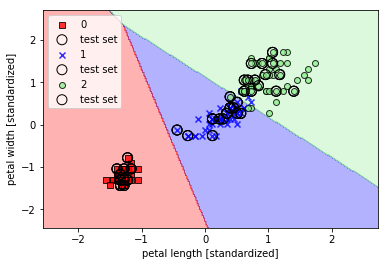

In [24]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, 
                      y_combined, 
                      classifier=lr, 
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show() 